# LOADING LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading Datasets

In [4]:
daily_activity = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
hourly_steps = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')
hourly_calories = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv')
sleepday = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
daily_calories = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv')
daily_intensity = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv')
weight_log = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')
daily_steps = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv')
heartrate_secs = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")



# DATA EXPLORATION

In [5]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [6]:
hourly_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [7]:
hourly_calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [8]:
sleepday.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [9]:
daily_calories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [10]:
daily_intensity.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [11]:
weight_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [12]:
daily_steps.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [13]:
heartrate_secs.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [14]:
print("Daily Activity:",daily_activity.columns)
print("Hourly Steps:",hourly_steps.columns)
print("Hourly Calories:",hourly_calories.columns)
print("Sleepday:",sleepday.columns)
print("Daily Calories:",daily_calories.columns)
print("Daily Intensity:",daily_intensity.columns)
print("Weight Log:",weight_log.columns)
print("Daily Steps:",daily_steps.columns)
print("Heart Rate:",heartrate_secs.columns)

Daily Activity: Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')
Hourly Steps: Index(['Id', 'ActivityHour', 'StepTotal'], dtype='object')
Hourly Calories: Index(['Id', 'ActivityHour', 'Calories'], dtype='object')
Sleepday: Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed'],
      dtype='object')
Daily Calories: Index(['Id', 'ActivityDay', 'Calories'], dtype='object')
Daily Intensity: Index(['Id', 'ActivityDay', 'Calories'], dtype='object')
Weight Log: Index(['Id', 'Date', 'WeightKg', 'WeightPounds', 'Fat', 'BMI',
       'IsManualReport', 'LogId'],
      dtype='object')
Daily Steps: Index(['Id', 'ActivityDay', 'StepTotal'], dtype='object')
He

In [15]:
daily_activity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [16]:
hourly_steps.dtypes

Id               int64
ActivityHour    object
StepTotal        int64
dtype: object

In [17]:
hourly_calories.dtypes

Id               int64
ActivityHour    object
Calories         int64
dtype: object

In [18]:
sleepday.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [19]:
daily_calories.dtypes


Id              int64
ActivityDay    object
Calories        int64
dtype: object

In [20]:
daily_intensity.dtypes

Id              int64
ActivityDay    object
Calories        int64
dtype: object

In [21]:
weight_log.dtypes

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object

In [22]:
daily_steps.dtypes

Id              int64
ActivityDay    object
StepTotal       int64
dtype: object

In [23]:
heartrate_secs.dtypes

Id        int64
Time     object
Value     int64
dtype: object

In [24]:
print("Shape of Daily Activity:",daily_activity.shape)
print("Shape of Hourly Steps:",hourly_steps.shape)
print("Shape of Hourly Calories:",hourly_calories.shape)
print("Shape of SleepDay:",sleepday.shape)
print("Shape of Daily Calories:",daily_calories.shape)  
print("Shape of Daily Intensity:",daily_intensity.shape)
print("Shape of Weight Logged:",weight_log.shape)
print("Shape of Daily Steps:",daily_steps.shape) 
print("Shape of Heart Rate:",heartrate_secs.shape) 

Shape of Daily Activity: (940, 15)
Shape of Hourly Steps: (22099, 3)
Shape of Hourly Calories: (22099, 3)
Shape of SleepDay: (413, 5)
Shape of Daily Calories: (940, 3)
Shape of Daily Intensity: (940, 3)
Shape of Weight Logged: (67, 8)
Shape of Daily Steps: (940, 3)
Shape of Heart Rate: (2483658, 3)


# DATA TRANSFORMATION

In [25]:
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"])
hourly_steps["ActivityHour"] = pd.to_datetime(hourly_calories["ActivityHour"])
hourly_calories["ActivityHour"] = pd.to_datetime(hourly_calories["ActivityHour"])
sleepday["SleepDay"] = pd.to_datetime(sleepday["SleepDay"])

In [26]:
print("Daily Acitivity data type is", daily_activity["ActivityDate"].dtypes, "data type")
print("Hourly Steps data type is", hourly_steps["ActivityHour"].dtypes, "data type")
print("Hourly Calories data type is", hourly_calories["ActivityHour"].dtypes, "data type")
print("Sleepday data type is", sleepday["SleepDay"].dtypes, "data type")

Daily Acitivity data type is datetime64[ns] data type
Hourly Steps data type is datetime64[ns] data type
Hourly Calories data type is datetime64[ns] data type
Sleepday data type is datetime64[ns] data type


In [27]:
for col in hourly_steps.columns, hourly_calories.columns:
    print (col)

Index(['Id', 'ActivityHour', 'StepTotal'], dtype='object')
Index(['Id', 'ActivityHour', 'Calories'], dtype='object')


In [28]:
merge_df = pd.merge(hourly_steps, hourly_calories,
                    on=['Id', 'ActivityHour'], how='inner')

merge_df.head()

,Id,ActivityHour,StepTotal,Calories
0,1503960366,2016-04-12 00:00:00,373,81
1,1503960366,2016-04-12 01:00:00,160,61
2,1503960366,2016-04-12 02:00:00,151,59
3,1503960366,2016-04-12 03:00:00,0,47
4,1503960366,2016-04-12 04:00:00,0,48


**Create new colums**

In [29]:
daily_activity["WeekDay"] = daily_activity["ActivityDate"].dt.day_name()
merge_df["WeekDay"] = merge_df["ActivityHour"].dt.day_name()
sleepday["WeekDay"] = sleepday["SleepDay"].dt.day_name()

In [30]:
# View changes
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,WeekDay
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [31]:
merge_df.head()

,Id,ActivityHour,StepTotal,Calories,WeekDay
0,1503960366,2016-04-12 00:00:00,373,81,Tuesday
1,1503960366,2016-04-12 01:00:00,160,61,Tuesday
2,1503960366,2016-04-12 02:00:00,151,59,Tuesday
3,1503960366,2016-04-12 03:00:00,0,47,Tuesday
4,1503960366,2016-04-12 04:00:00,0,48,Tuesday


In [32]:
merge_df["DateHour"] = merge_df["ActivityHour"].dt.hour

In [33]:
merge_df.head()

,Id,ActivityHour,StepTotal,Calories,WeekDay,DateHour
0,1503960366,2016-04-12 00:00:00,373,81,Tuesday,0
1,1503960366,2016-04-12 01:00:00,160,61,Tuesday,1
2,1503960366,2016-04-12 02:00:00,151,59,Tuesday,2
3,1503960366,2016-04-12 03:00:00,0,47,Tuesday,3
4,1503960366,2016-04-12 04:00:00,0,48,Tuesday,4


In [34]:
merge_df["ActivityDay"] = merge_df["ActivityHour"].dt.date

In [35]:
merge_df = merge_df.drop("ActivityHour", axis = 1)
merge_df.head()

,Id,StepTotal,Calories,WeekDay,DateHour,ActivityDay
0,1503960366,373,81,Tuesday,0,2016-04-12
1,1503960366,160,61,Tuesday,1,2016-04-12
2,1503960366,151,59,Tuesday,2,2016-04-12
3,1503960366,0,47,Tuesday,3,2016-04-12
4,1503960366,0,48,Tuesday,4,2016-04-12


In [36]:
# Let's change ActivityDay to DateTime data type

merge_df["ActivityDay"] = pd.to_datetime(merge_df["ActivityDay"])

In [37]:
sleepday = sleepday.rename(columns={'SleepDay': 'ActivityDay'})
sleepday.head()

,Id,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeekDay
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


In [38]:
for col in merge_df.columns, sleepday.columns:
    print (col)

Index(['Id', 'StepTotal', 'Calories', 'WeekDay', 'DateHour', 'ActivityDay'], dtype='object')
Index(['Id', 'ActivityDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'WeekDay'],
      dtype='object')


In [39]:
merge_df2 = pd.merge(merge_df, sleepday,
                    on=['Id', 'ActivityDay', 'WeekDay'], how='inner')

merge_df2.head(5)

,Id,StepTotal,Calories,WeekDay,DateHour,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,373,81,Tuesday,0,2016-04-12,1,327,346
1,1503960366,160,61,Tuesday,1,2016-04-12,1,327,346
2,1503960366,151,59,Tuesday,2,2016-04-12,1,327,346
3,1503960366,0,47,Tuesday,3,2016-04-12,1,327,346
4,1503960366,0,48,Tuesday,4,2016-04-12,1,327,346


In [40]:
merge_df2.tail(5)

,Id,StepTotal,Calories,WeekDay,DateHour,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
9766,8792009665,8,74,Wednesday,19,2016-05-04,1,439,463
9767,8792009665,132,91,Wednesday,20,2016-05-04,1,439,463
9768,8792009665,0,71,Wednesday,21,2016-05-04,1,439,463
9769,8792009665,0,70,Wednesday,22,2016-05-04,1,439,463
9770,8792009665,0,70,Wednesday,23,2016-05-04,1,439,463


In [41]:
print("Merge_df2 Dataframe:",merge_df2.Id.nunique(), "unique users")
print("Merge_df2 DataFrame has",merge_df2.isnull().values.sum(), "missing values")

Merge_df2 Dataframe: 24 unique users
Merge_df2 DataFrame has 0 missing values


In [42]:
new_cols = ["Id", "ActivityDate", 
            "WeekDay", "TotalSteps", 
            "TotalDistance", "VeryActiveDistance", 
            "ModeratelyActiveDistance", "LightActiveDistance", 
            "SedentaryActiveDistance", "VeryActiveMinutes", 
            "FairlyActiveMinutes", "LightlyActiveMinutes", 
            "SedentaryMinutes", "TotalActiveMinutes", 
            "TotalMinutes", "TotalActiveHours", "Calories"]

daily_activity = daily_activity.reindex(columns=new_cols)

In [44]:
daily_activity[["TotalActiveMinutes",
                "TotalMinutes", "TotalActiveHours"]].head()

,TotalActiveMinutes,TotalMinutes,TotalActiveHours
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [45]:
daily_activity["TotalActiveMinutes"] = daily_activity["VeryActiveMinutes"] + daily_activity["FairlyActiveMinutes"] + daily_activity["LightlyActiveMinutes"]
daily_activity["TotalMinutes"] = daily_activity["TotalActiveMinutes"] + daily_activity["SedentaryMinutes"]
daily_activity["TotalActiveHours"] = round(daily_activity["TotalActiveMinutes"] / 60)

In [46]:
daily_activity[["TotalActiveMinutes", "TotalMinutes", "TotalActiveHours"]].head()

,TotalActiveMinutes,TotalMinutes,TotalActiveHours
0,366,1094,6.0
1,257,1033,4.0
2,222,1440,4.0
3,272,998,5.0
4,267,1040,4.0


In [47]:
daily_activity.head()

,Id,ActivityDate,WeekDay,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes,TotalMinutes,TotalActiveHours,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,1.88,0.55,6.06,0.0,25,13,328,728,366,1094,6.0,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,1.57,0.69,4.71,0.0,21,19,217,776,257,1033,4.0,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,2.44,0.40,3.91,0.0,30,11,181,1218,222,1440,4.0,1776
3,1503960366,2016-04-15,Friday,9762,6.28,2.14,1.26,2.83,0.0,29,34,209,726,272,998,5.0,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,2.71,0.41,5.04,0.0,36,10,221,773,267,1040,4.0,1863


# ANALYZE

In [48]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes,TotalMinutes,TotalActiveHours,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,227.542553,1218.753191,3.775532,2303.609574
std,2.424805e+09,5087.150742,3.924606,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,121.776307,265.931767,2.057646,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,146.750000,989.750000,2.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,247.000000,1440.000000,4.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,317.250000,1440.000000,5.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,552.000000,1440.000000,9.000000,4900.000000


In [49]:
merge_df.describe()

,Id,StepTotal,Calories,DateHour
count,2.209900e+04,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,320.166342,97.386760,11.415765
std,2.422500e+09,690.384228,60.702622,6.915140
min,1.503960e+09,0.000000,42.000000,0.000000
25%,2.320127e+09,0.000000,63.000000,5.000000
50%,4.445115e+09,40.000000,83.000000,11.000000
75%,6.962181e+09,357.000000,108.000000,17.000000
max,8.877689e+09,10554.000000,948.000000,23.000000


In [50]:
merge_df2.describe()

,Id,StepTotal,Calories,DateHour,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,9.771000e+03,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000
mean,5.000942e+09,358.765838,100.978917,11.422884,1.120356,419.350322,458.607921
std,2.061194e+09,652.628865,63.440338,6.921320,0.347304,118.789342,127.597596
min,1.503960e+09,0.000000,42.000000,0.000000,1.000000,58.000000,61.000000
25%,3.977334e+09,0.000000,63.000000,5.000000,1.000000,361.000000,402.000000
50%,4.702922e+09,107.000000,84.000000,11.000000,1.000000,433.000000,463.000000
75%,6.962181e+09,420.000000,117.000000,17.000000,1.000000,490.000000,527.000000
max,8.792010e+09,6357.000000,669.000000,23.000000,3.000000,796.000000,961.000000


# Data visualization

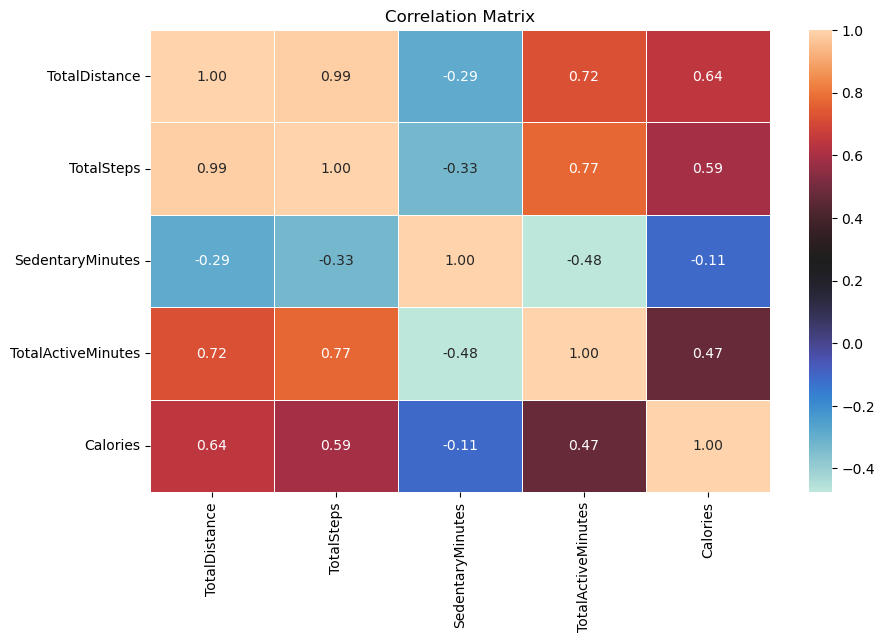

In [51]:
Corr1 = ["TotalDistance", "TotalSteps", 
         "SedentaryMinutes", "TotalActiveMinutes", "Calories"]

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(daily_activity[Corr1].corr(), 
            annot = True, 
            fmt = ".2f",
            linewidths=0.5,
           cmap="icefire")

ax.set_title('Correlation Matrix');

/opt/conda/lib/python3.10/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


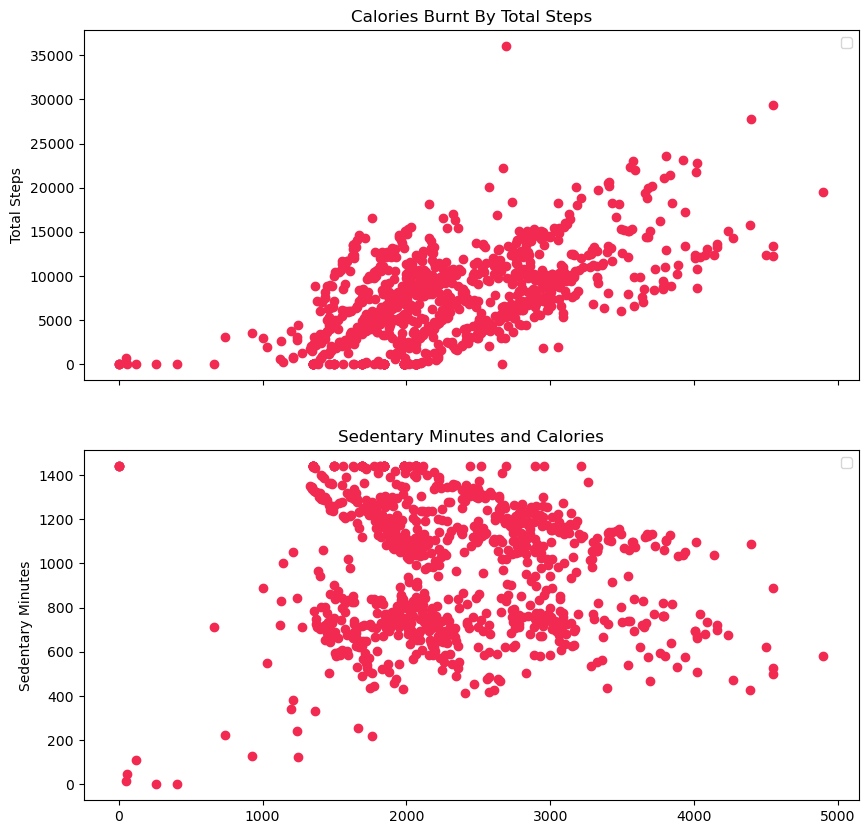

In [52]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
                             ncols=1,
                             figsize=(10, 10),
                               sharex=True)

scatter = ax0.scatter(x=daily_activity["Calories"],
                     y=daily_activity["TotalSteps"],
                     color="#f22a51")
ax0.set(title="Calories Burnt By Total Steps",
       ylabel="Total Steps")

ax0.legend(*scatter.legend_elements(), title=None)

scatter = ax1.scatter(x=daily_activity["Calories"],
                     y=daily_activity["SedentaryMinutes"],
                     color="#f22a51")
ax1.set(title="Sedentary Minutes and Calories",
       ylabel="Sedentary Minutes")

ax1.legend(*scatter.legend_elements(), title=None);


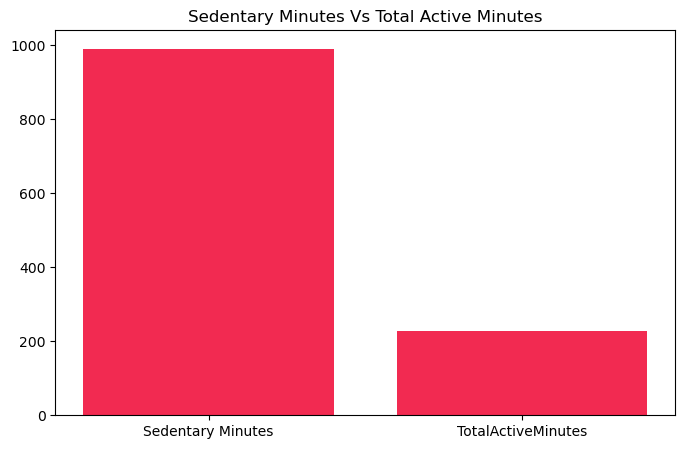

In [53]:
fig, ax = plt.subplots(figsize=(8,5))
x = np.array(["Sedentary Minutes", "TotalActiveMinutes"])
y = np.array([daily_activity["SedentaryMinutes"].mean(),
              daily_activity["TotalActiveMinutes"].mean()])

plt.title("Sedentary Minutes Vs Total Active Minutes")
plt.bar(x, y, width = 0.8, color = "#f22a51")
plt.show() 

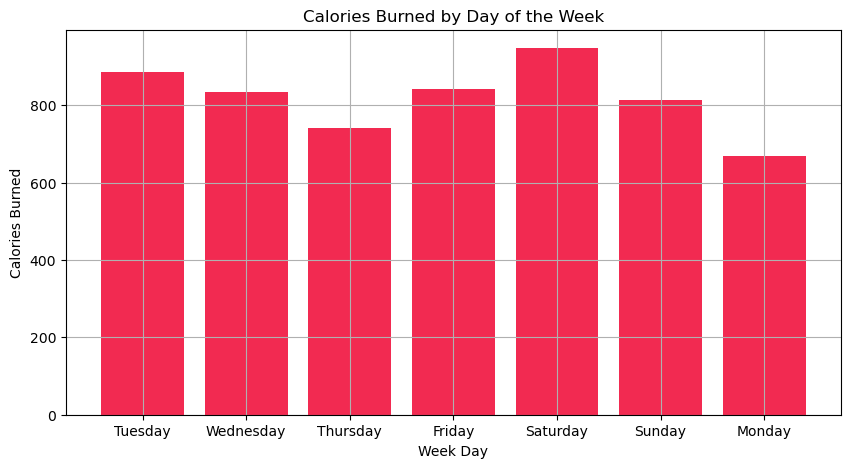

In [54]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(merge_df.WeekDay, merge_df.Calories, color = "#f22a51")
plt.xlabel("Week Day")
plt.ylabel("Calories Burned")
plt.title("Calories Burned by Day of the Week")
plt.grid()

plt.show()

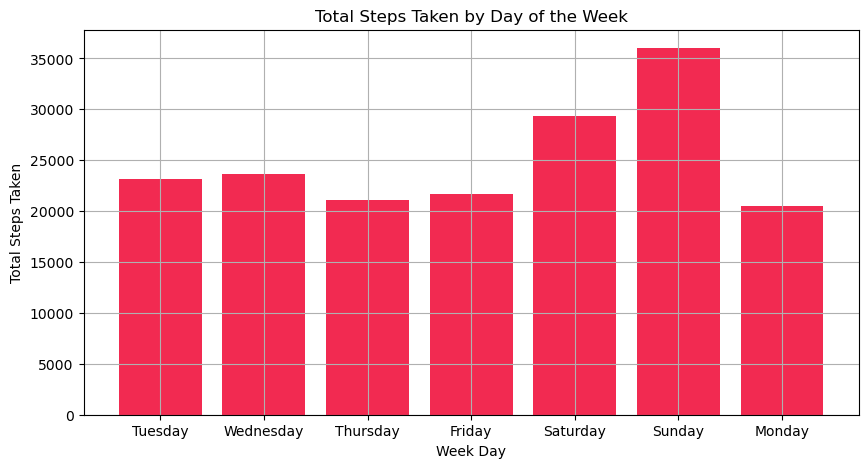

In [55]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(daily_activity.WeekDay, daily_activity.TotalSteps, 
        color = "#f22a51")
plt.xlabel("Week Day")
plt.ylabel("Total Steps Taken")
plt.title("Total Steps Taken by Day of the Week")
plt.grid()
plt.show()

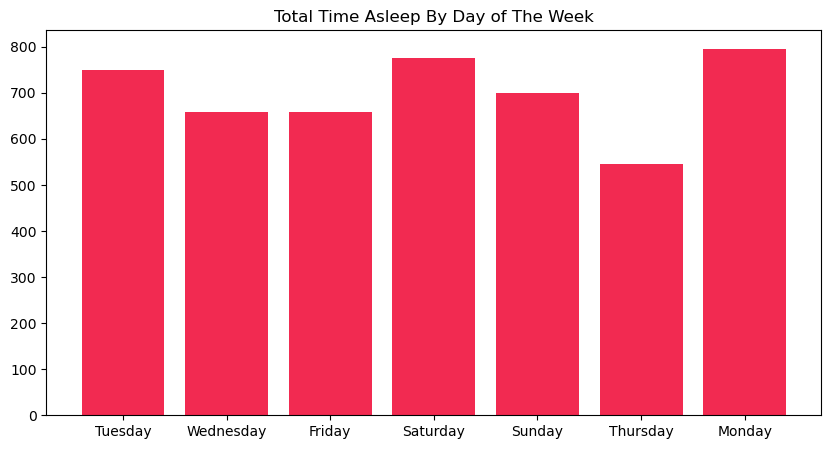

In [56]:
fig, ax = plt.subplots(figsize=(10,5))
x = merge_df2["WeekDay"]
y = merge_df2["TotalMinutesAsleep"]

plt.title("Total Time Asleep By Day of The Week")
plt.bar(x, y, width = 0.8, color = "#f22a51")
plt.show() 

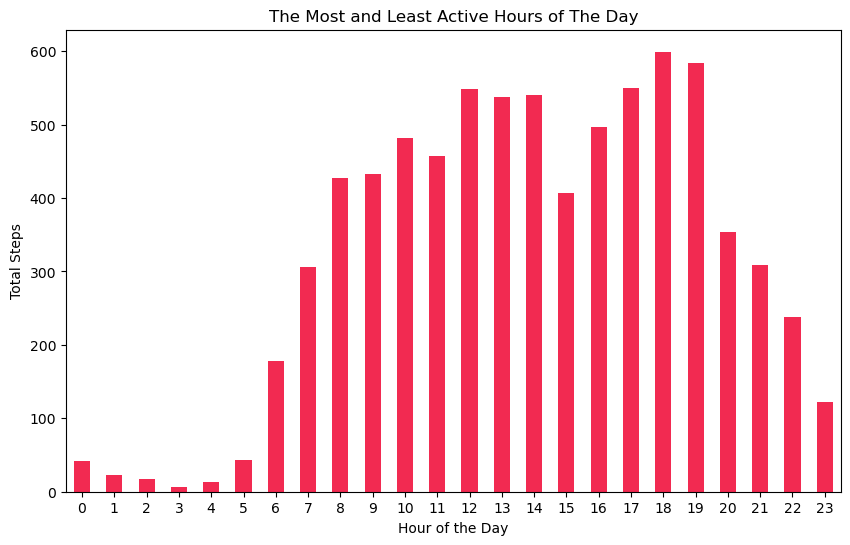

In [57]:
#Least active time of the day for targeted Ads

fig, axs = plt.subplots(figsize=(10, 6))
merge_df.groupby(merge_df['DateHour'])['StepTotal'].mean().plot(kind='bar', rot=0, ax=axs, color='#f22a51', title='The Most and Least Active Hours of The Day')
plt.xlabel("Hour of the Day")
plt.ylabel("Total Steps")
plt.show()


# RECOMMENDATION

**1.Promotion**

**The data we explored revealed that consumers are less active between 8 and 10 p.m., shortly before they retire for the night. This is the ideal moment for Bellabeat to schedule their advertising initiatives for optimal results. Google AdWords, for example, allows internet advertisers to schedule when their adverts are shown with its ad scheduling function. Such functions can allow Bellabeat to effectively reach its consumers. Scheduling adverts will also help Bellabeat save money on advertisements.**

**2.Retention**

**The objective of any membership program is not limited to generating a regular stream of new members. Retention is crucial! According to an online report, eighty percent of customers quit their subscription to a member site within the first two years of joining the site. For Bellabeat to retain its consumers, it must focus on personalized contents that offer value. For instance, the data revealed a positive correlation between the number of steps walked and the number of calories burnt. The more steps a person takes each day, the more calories they burn.**

**The data also revealed that one of the issues people have is that they are hardly able to reach the minimum 10,000 steps per day recommended for healthy adults. To address this issue, Bellabeat can provide fascinating tips to assist its consumers achieve their daily objectives. This may be published periodically on its website. Additionally, it can create engaging challenges to motivate its users to walk regularly. This will not only drive engagement, but also provide enormous value to them.**

**I also noted that people spend far more time being inactive than being active. Inactivity is related with several health problems, including obesity, heart disease, stroke, etc. Bellabeat can create explainer videos and blogs to educate its users about the negative impacts of sedentary lifestyle and how to prevent them. This is also a fantastic opportunity to promote its other products, such as the Bellabeat app, which provides users with lifestyle-related health data, and Time, which links to the Bellabeat app to offer users with insights on their daily wellbeing**